# Assignment: PCA Implementation

In [3]:
import pandas as pd

# Load dataset into a Pandas dataframe
df = pd.read_csv('wine.data')

In [6]:
df.shape

(177, 14)

In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
X

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [18]:
y

0      1050
1      1185
2      1480
3       735
4      1450
       ... 
172     740
173     750
174     835
175     840
176     560
Name: 1065, Length: 177, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

#scale the features 
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [21]:
X_scaled

array([[-1.22246766,  0.2558245 , -0.50162433, ..., -0.29113022,
         0.40709978,  1.13169801],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.26972932,
         0.3195674 ,  0.80457911],
       [-1.22246766,  1.70650069, -0.34931478, ...,  1.1843618 ,
        -0.4244579 ,  1.20281081],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ...,  2.2197948 ,
        -1.60614514, -1.48525319],
       [ 1.36887097,  0.21862767,  0.22408586, ...,  1.83150742,
        -1.56237895, -1.39991783],
       [ 1.36887097,  1.40892609,  1.57695301, ...,  1.78836438,
        -1.51861275, -1.42836295]])

In [22]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

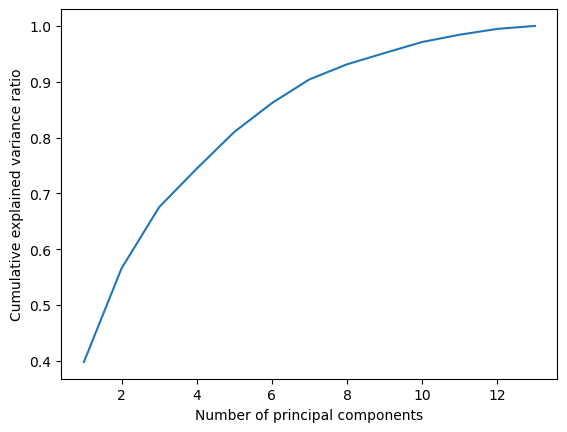

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_var_ratio)+1), cumulative_var_ratio)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

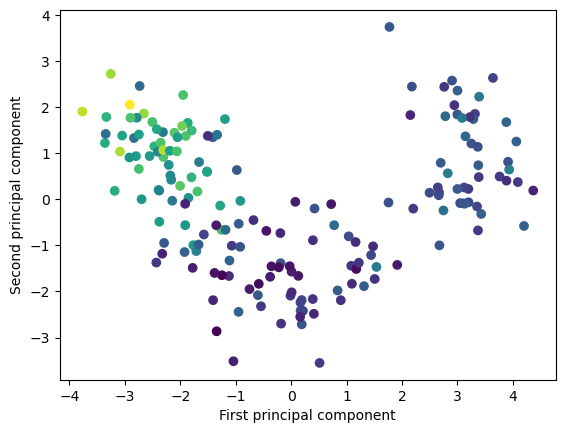

In [24]:
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


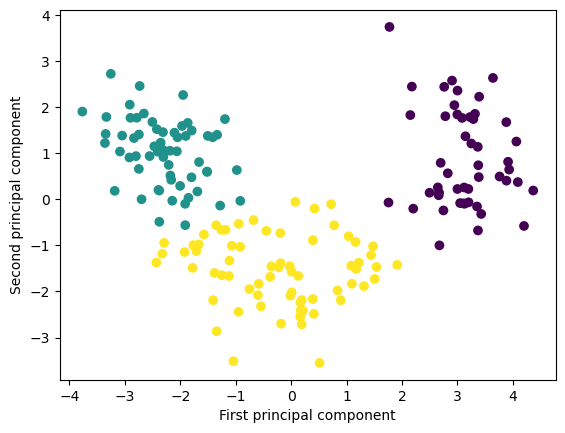

In [25]:
from sklearn.cluster import KMeans

# Perform clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

# Create a scatter plot of the first two principal components, colored by cluster label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()